<h2><center>ANALYSIS ZOMATO DATASET</center></h2>

### ABOUT DATASET

   - <b> url </b>:  contains the url of the restaurant in the zomato website

   - <b> address </b> :  contains the address of the restaurant in Bengaluru

   - <b> name </b>:  contains the name of the restaurant

   - <b> online_order </b> :  whether online ordering is available in the restaurant or not

   - <b> book_table</b> :  table book option available or not

   - <b> rate </b> :  contains the overall rating of the restaurant out of 5

   - <b> votes </b> :  contains total number of rating for the restaurant as of the above mentioned date

   - <b> phone </b> :  contains the phone number of the restaurant

   - <b> location </b> :  contains the neighborhood in which the restaurant is located

   - <b> rest_type </b> :  restaurant type

   - <b> dish_liked </b> :  dishes people liked in the restaurant

   - <b> cuisines </b> :  food styles, separated by comma

   - <b> approx_cost(for two people) </b> :  contains the approximate cost for meal for two people

   - <b> reviews_list </b> :  list of tuples containing reviews for the restaurant, each tuple consists of two values, rating and review by the customer

   - <b> menu_item </b> :  contains list of menus available in the restaurant

   - <b> listed_in(type) </b> :  type of meal

   - <b> listed_in(city) </b> :  contains the neighborhood in which the restaurant is listed

### RECOMMANDATION SYSTEM

In [118]:
# !pip install nltk


In [119]:
# from google.colab import drive
# drive.mount('/content/drive')

In [120]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')
import re
import ast
from nltk.corpus import stopwords
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [121]:
zomato_real = pd.read_csv("zomato.csv")


# Understanding Data Set


In [122]:
zomato_real.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [123]:
zomato_real['url'][0]

'https://www.zomato.com/bangalore/jalsa-banashankari?context=eyJzZSI6eyJlIjpbNTg2OTQsIjE4Mzc1NDc0IiwiNTkwOTAiLCIxODM4Mjk0NCIsIjE4MjI0Njc2IiwiNTkyODkiLCIxODM3MzM4NiJdLCJ0IjoiUmVzdGF1cmFudHMgaW4gQmFuYXNoYW5rYXJpIHNlcnZpbmcgQnVmZmV0In19'

In [124]:
df = zomato_real

In [125]:
name = list(df.name.unique())

In [126]:
df.name.nunique()

8792

In [127]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [128]:
df

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,080 40301477,Whitefield,Bar,NaN,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
51713,https://www.zomato.com/bangalore/vinod-bar-and...,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,NaN,0,+91 8197675843,Whitefield,Bar,NaN,Finger Food,600,[],[],Pubs and bars,Whitefield
51714,https://www.zomato.com/bangalore/plunge-sherat...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,NaN,Whitefield,Bar,NaN,Finger Food,"2,000",[],[],Pubs and bars,Whitefield
51715,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield


In [129]:
new_shop =df[df["rate"] == "NEW" ]

In [130]:
(new_shop.shape)[0]

2208

# Cleaning Data Set


In [131]:
# Remove rows where 'column_name' contains the substring 'new'
df = df[~df['rate'].str.contains('NEW', case=False, na=False)]


In [132]:
# Remove rows where 'rate' contains 'new' or is None
df = df[~df['rate'].str.contains('new', case=False, na=False) & df['rate'].notna()]


In [133]:
# Remove rows where 'column_name' contains the substring 'new'
df = df[~df['rate'].str.contains('-', case=False, na=False)]


In [134]:
df

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51709,https://www.zomato.com/bangalore/the-farm-hous...,"136, SAP Labs India, KIADB Export Promotion In...",The Farm House Bar n Grill,No,No,3.7 /5,34,+91 9980121279\n+91 9900240646,Whitefield,"Casual Dining, Bar",NaN,"North Indian, Continental",800,"[('Rated 4.0', 'RATED\n Ambience- Big and spa...",[],Pubs and bars,Whitefield
51711,https://www.zomato.com/bangalore/bhagini-2-whi...,"139/C1, Next To GR Tech Park, Pattandur Agraha...",Bhagini,No,No,2.5 /5,81,080 65951222,Whitefield,"Casual Dining, Bar","Biryani, Andhra Meal","Andhra, South Indian, Chinese, North Indian",800,"[('Rated 4.0', 'RATED\n A fine place to chill...",[],Pubs and bars,Whitefield
51712,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,080 40301477,Whitefield,Bar,NaN,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
51715,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield


In [135]:
df["menu_item"].unique()

array(['[]',
       "['Chocolate Fantasy (Pack Of 5)', 'Pan Cake (Pack Of 6)', 'Gulab Jamun (Pack Of 10)', 'Gulkand Shot (Pack Of 5)', 'Chocolate Decadence (Pack of 2)', 'CheeseCake (Pack Of 2)', 'Red Velvet Slice Cake (Pack of 2)', 'Red Velvet Slice Cake & Cheese Cake (Pack of 2)', 'Red Velvet Slice Cake & Chocolate Decadence Cake (Pack of 2)', 'Hazelnut Brownie (Pack of 2)', 'Moments', 'Red Velvet Cake With Butter Cream Frosting (750 Gm)', 'Red Velvet Slice Cake (Pack of 2)', 'Red Velvet Slice Cake & Cheese Cake (Pack of 2)', 'Red Velvet Slice Cake & Chocolate Decadence Cake (Pack of 2)', 'Red Velvet Slice Cake (Pack of 1)', 'Valentine Red Velvet Jar', 'Valentine Chocolate Jar', 'Valentines Jar Combo', 'Pink Guava 500 ML', 'Oreo Vanilla 500 ML', 'Cookie Crumble 500 ML', 'Chocolate Fantasy', 'Gulkand-E-Bahar', 'Pan Cake', 'Hazelnut Brownie (Pack Of 1)', 'Gulab Jamun (Pack Of 2)', 'Plum Cake', 'Red Velvet Cake With Butter Cream Frosting (750 Gm)', 'Chocolate Mud Cake (700 Gms)', 'Chees

In [136]:
df["rest_type"].unique()

array(['Casual Dining', 'Cafe, Casual Dining', 'Quick Bites',
       'Casual Dining, Cafe', 'Cafe', 'Quick Bites, Cafe',
       'Cafe, Quick Bites', 'Delivery', 'Mess', 'Dessert Parlor',
       'Bakery, Dessert Parlor', 'Pub', 'Bakery', 'Takeaway, Delivery',
       'Fine Dining', 'Beverage Shop', 'Sweet Shop', 'Bar',
       'Dessert Parlor, Sweet Shop', 'Bakery, Quick Bites',
       'Sweet Shop, Quick Bites', 'Kiosk', 'Food Truck',
       'Quick Bites, Dessert Parlor', 'Beverage Shop, Quick Bites',
       'Beverage Shop, Dessert Parlor', 'Takeaway', 'Pub, Casual Dining',
       'Casual Dining, Bar', 'Dessert Parlor, Beverage Shop',
       'Quick Bites, Bakery', 'Microbrewery, Casual Dining', 'Lounge',
       'Bar, Casual Dining', 'Food Court', 'Cafe, Bakery', nan, 'Dhaba',
       'Quick Bites, Sweet Shop', 'Microbrewery',
       'Food Court, Quick Bites', 'Quick Bites, Beverage Shop',
       'Pub, Bar', 'Casual Dining, Pub', 'Lounge, Bar',
       'Dessert Parlor, Quick Bites', 'Food Co

In [137]:
df["rest_type"].nunique()

87

In [138]:
df["rate"].nunique()

62

In [139]:
rate =df["rate"].unique()

In [140]:
rate

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5', '4.5/5',
       '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5', '3.4 /5',
       '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5', '4.1 /5',
       '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5', '3.5 /5',
       '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5', '4.3 /5',
       '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5', '4.9 /5',
       '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5', '2.1 /5',
       '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [141]:
df[df["rate"]=='-'].shape

(0, 17)

In [142]:
df['rating'] = df['rate'].str.extract(r'(\d+\.\d+)')
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

In [143]:
df.dtypes

url                             object
address                         object
name                            object
online_order                    object
book_table                      object
rate                            object
votes                            int64
phone                           object
location                        object
rest_type                       object
dish_liked                      object
cuisines                        object
approx_cost(for two people)     object
reviews_list                    object
menu_item                       object
listed_in(type)                 object
listed_in(city)                 object
rating                         float64
dtype: object

### Removing the Cost column data that contains None and lest than 100

In [144]:
df =df[df["approx_cost(for two people)"].notna() ]

In [145]:
df["approx_cost(for two people)"].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '1,100', '1,600', '230',
       '130', '1,700', '1,350', '2,200', '1,400', '2,000', '1,800',
       '1,900', '180', '330', '2,500', '2,100', '3,000', '2,800', '3,400',
       '50', '40', '1,250', '3,500', '4,000', '2,400', '2,600', '1,450',
       '70', '3,200', '240', '6,000', '1,050', '2,300', '4,100', '120',
       '5,000', '3,700', '1,650', '2,700', '4,500', '80'], dtype=object)

### Converting to numeric by removing comma from the cost

In [146]:
df['Cost_For_two'] = df['approx_cost(for two people)'].replace(',', '', regex=True)  # Remove commas
df['Cost_For_two'] = pd.to_numeric(df['Cost_For_two'], errors='coerce')  # Convert to numeric


In [147]:
(df[df['Cost_For_two'] <200].shape)[0]

1998

In [148]:
df = df[df['Cost_For_two'] >100]

In [149]:
df["approx_cost(for two people)"].nunique()

58

In [150]:
cost =df["Cost_For_two"].unique()

In [151]:
cost

array([ 800,  300,  600,  700,  550,  500,  450,  650,  400,  900,  200,
        750,  150,  850, 1200,  350,  250,  950, 1000, 1500, 1300,  199,
       1100, 1600,  230,  130, 1700, 1350, 2200, 1400, 2000, 1800, 1900,
        180,  330, 2500, 2100, 3000, 2800, 3400, 1250, 3500, 4000, 2400,
       2600, 1450, 3200,  240, 6000, 1050, 2300, 4100,  120, 5000, 3700,
       1650, 2700, 4500])

In [152]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)', 'rating', 'Cost_For_two'],
      dtype='object')

In [153]:
# Exclude specific columns
df = df.drop(columns=['approx_cost(for two people)', 'rate'])


In [154]:
df

,url,address,name,online_order,book_table,votes,phone,location,rest_type,dish_liked,cuisines,reviews_list,menu_item,listed_in(type),listed_in(city),rating,Cost_For_two
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese","[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,4.1,800
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai","[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,4.1,800
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian","[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,3.8,800
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian","[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,3.7,300
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani","[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari,3.8,600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51709,https://www.zomato.com/bangalore/the-farm-hous...,"136, SAP Labs India, KIADB Export Promotion In...",The Farm House Bar n Grill,No,No,34,+91 9980121279\n+91 9900240646,Whitefield,"Casual Dining, Bar",NaN,"North Indian, Continental","[('Rated 4.0', 'RATED\n Ambience- Big and spa...",[],Pubs and bars,Whitefield,3.7,800
51711,https://www.zomato.com/bangalore/bhagini-2-whi...,"139/C1, Next To GR Tech Park, Pattandur Agraha...",Bhagini,No,No,81,080 65951222,Whitefield,"Casual Dining, Bar","Biryani, Andhra Meal","Andhra, South Indian, Chinese, North Indian","[('Rated 4.0', 'RATED\n A fine place to chill...",[],Pubs and bars,Whitefield,2.5,800
51712,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,27,080 40301477,Whitefield,Bar,NaN,Continental,"[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield,3.6,1500
51715,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,236,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield,4.3,2500


## Normalizing the Name , cuisine columns and creating Cuisine_Count


In [155]:

# Specify the columns you want to normalize
columns_to_normalize = ['name', 'cuisines']

# Convert specified columns to lowercase
for col in columns_to_normalize:
    df[col] = df[col].str.lower()




In [156]:
# Handle None values by applying a condition
df['Cuisine_Count'] = df['cuisines'].apply(lambda x: len(x.split(',')) if isinstance(x, str) else 0)

df

,url,address,name,online_order,book_table,votes,phone,location,rest_type,dish_liked,cuisines,reviews_list,menu_item,listed_in(type),listed_in(city),rating,Cost_For_two,Cuisine_Count
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",jalsa,Yes,Yes,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","north indian, mughlai, chinese","[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,4.1,800,3
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",spice elephant,Yes,No,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","chinese, north indian, thai","[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,4.1,800,3
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",san churro cafe,Yes,No,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","cafe, mexican, italian","[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,3.8,800,3
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",addhuri udupi bhojana,No,No,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"south indian, north indian","[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,3.7,300,2
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",grand village,No,No,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","north indian, rajasthani","[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari,3.8,600,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51709,https://www.zomato.com/bangalore/the-farm-hous...,"136, SAP Labs India, KIADB Export Promotion In...",the farm house bar n grill,No,No,34,+91 9980121279\n+91 9900240646,Whitefield,"Casual Dining, Bar",NaN,"north indian, continental","[('Rated 4.0', 'RATED\n Ambience- Big and spa...",[],Pubs and bars,Whitefield,3.7,800,2
51711,https://www.zomato.com/bangalore/bhagini-2-whi...,"139/C1, Next To GR Tech Park, Pattandur Agraha...",bhagini,No,No,81,080 65951222,Whitefield,"Casual Dining, Bar","Biryani, Andhra Meal","andhra, south indian, chinese, north indian","[('Rated 4.0', 'RATED\n A fine place to chill...",[],Pubs and bars,Whitefield,2.5,800,4
51712,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",best brews - four points by sheraton bengaluru...,No,No,27,080 40301477,Whitefield,Bar,NaN,continental,"[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield,3.6,1500,1
51715,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,chime - sheraton grand bengaluru whitefield ho...,No,Yes,236,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",finger food,"[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield,4.3,2500,1


In [157]:
# Find the row with the maximum number of cuisines
max_cuisine_row = df.loc[df['Cuisine_Count'].idxmax()]
max_cuisine_row

url                https://www.zomato.com/bangalore/freshmenu-ban...
address            10, Stavyah Arcade, 3rd Floor 9th Main, Yarab ...
name                                                       freshmenu
online_order                                                     Yes
book_table                                                        No
votes                                                            627
phone                                                   080 40424242
location                                                Banashankari
rest_type                                                   Delivery
dish_liked         Salads, Sandwiches, Salad, Thai Rice, Pasta, N...
cuisines           healthy food, chinese, biryani, north indian, ...
reviews_list       [('Rated 5.0', 'RATED\n  What: continental foo...
menu_item          ["Egg 'n' Chicken Ham Breakwich", 'Maple Panca...
listed_in(type)                                             Delivery
listed_in(city)                   

In [158]:
# Find the row with the maximum number of cuisines
min_cuisine_row = df.loc[df['Cuisine_Count'].idxmin()]
min_cuisine_row

url                https://www.zomato.com/bangalore/noodle-oodle-...
address            V3/1, NGEF, Industrial Estate, Mahadevapura Po...
name                                                    noodle oodle
online_order                                                     Yes
book_table                                                        No
votes                                                              9
phone                                                 +91 9945670505
location                                                  Whitefield
rest_type                                                   Delivery
dish_liked                                                       NaN
cuisines                                                         NaN
reviews_list       [('Rated 4.0', 'RATED\n  Lil oily else good'),...
menu_item          ['Chilly Chicken', 'Mixed Veg Noodles', 'Veg S...
listed_in(type)                                             Delivery
listed_in(city)                   

In [159]:
# Six hotels with 0 cuisines
(df[df['Cuisine_Count'] ==0].shape)[0]

6

In [160]:
df[df['Cuisine_Count'] ==0]

,url,address,name,online_order,book_table,votes,phone,location,rest_type,dish_liked,cuisines,reviews_list,menu_item,listed_in(type),listed_in(city),rating,Cost_For_two,Cuisine_Count
6887,https://www.zomato.com/bangalore/noodle-oodle-...,"V3/1, NGEF, Industrial Estate, Mahadevapura Po...",noodle oodle,Yes,No,9,+91 9945670505,Whitefield,Delivery,NaN,NaN,"[('Rated 4.0', 'RATED\n Lil oily else good'),...","['Chilly Chicken', 'Mixed Veg Noodles', 'Veg S...",Delivery,Brookefield,3.6,400,0
24725,https://www.zomato.com/bangalore/swagatham-ray...,"604, 2nd Block, HBR Layout Kalyan Nagar, Banga...",swagatham rayalaseema ruchulu,Yes,No,24,+91 9986222755,Kalyan Nagar,Casual Dining,NaN,NaN,"[('Rated 1.0', ""RATED\n Mediocre!\n\nWe went ...",[],Dine-out,Kalyan Nagar,3.3,600,0
26186,https://www.zomato.com/bangalore/swagatham-ray...,"604, 2nd Block, HBR Layout Kalyan Nagar, Banga...",swagatham rayalaseema ruchulu,Yes,No,24,+91 9986222755,Kalyan Nagar,Casual Dining,NaN,NaN,"[('Rated 1.0', ""RATED\n Mediocre!\n\nWe went ...",[],Dine-out,Kammanahalli,3.3,600,0
40625,https://www.zomato.com/bangalore/noodle-oodle-...,"V3/1, NGEF, Industrial Estate, Mahadevapura Po...",noodle oodle,Yes,No,12,080 49652930,Whitefield,Delivery,NaN,NaN,"[('Rated 4.0', 'RATED\n Lil oily else good'),...","['Gobi Manchurian', 'Chilly Chicken', 'Mixed V...",Delivery,Marathahalli,3.7,400,0
50355,https://www.zomato.com/bangalore/noodle-oodle-...,"V3/1, NGEF, Industrial Estate, Mahadevapura Po...",noodle oodle,Yes,No,12,080 49652930,Whitefield,Delivery,NaN,NaN,"[('Rated 4.0', 'RATED\n Lil oily else good'),...",[],Delivery,Whitefield,3.7,400,0
50439,https://www.zomato.com/bangalore/taste-of-chet...,"V3/1, NGEF, Industrial Estate, Mahadevapura Po...",taste of chettinad,Yes,No,6,+91 9595783578,Whitefield,Delivery,NaN,NaN,"[('Rated 1.0', 'RATED\n The biryani was not e...",[],Delivery,Whitefield,3.2,400,0


In [161]:
# Six hotels with 0 cuisines
(df[df['Cuisine_Count'] ==1].shape)[0]

8455

In [162]:
df[df['Cuisine_Count'] ==1]

,url,address,name,online_order,book_table,votes,phone,location,rest_type,dish_liked,cuisines,reviews_list,menu_item,listed_in(type),listed_in(city),rating,Cost_For_two,Cuisine_Count
5,https://www.zomato.com/bangalore/timepass-dinn...,"37, 5-1, 4th Floor, Bosco Court, Gandhi Bazaar...",timepass dinner,Yes,No,286,+91 9980040002\r\n+91 9980063005,Basavanagudi,Casual Dining,"Onion Rings, Pasta, Kadhai Paneer, Salads, Sal...",north indian,"[('Rated 3.0', 'RATED\n Food 3/5\nAmbience 3/...",[],Buffet,Banashankari,3.8,600,1
10,https://www.zomato.com/bangalore/caf%C3%A9-dow...,"12,29 Near PES University Back Gate, D'Souza N...",cafãâãâãâãâãâãâãâãâ© down the a...,Yes,No,402,080 26724489\r\n+91 7406048982,Banashankari,Cafe,"Waffles, Pasta, Crispy Chicken, Honey Chilli C...",cafe,"[('Rated 4.0', 'RATED\n We ended up here on a...",[],Cafes,Banashankari,4.1,500,1
15,https://www.zomato.com/bangalore/cafe-vivacity...,"2303, 21st Cross, K R Road, 2nd Stage, Banasha...",cafe vivacity,Yes,No,90,080 26768182\r\n+91 9845704455,Banashankari,Cafe,"Garlic Bread, Burgers, Sandwiches, Pizza, Hot ...",cafe,"[('Rated 2.0', 'RATED\n Not so good place as ...",[],Cafes,Banashankari,3.8,650,1
24,https://www.zomato.com/bangalore/hide-out-cafe...,"775/1, Opposite Gupta Collage, 7th Block, 3rd ...",hide out cafe,No,No,31,+91 9901481185,Banashankari,Cafe,NaN,cafe,"[('Rated 4.0', 'RATED\n The food was quite go...",[],Cafes,Banashankari,3.7,300,1
33,https://www.zomato.com/bangalore/ovenstory-piz...,"101, Ground Floor, Manjunatha Complex, 22nd Ma...",ovenstory pizza,Yes,No,172,+91 7738383000,Banashankari,Delivery,"Paneer Tikka, Garlic Bread, Thin Crust Pizza, ...",pizza,"[('Rated 4.0', 'RATED\n Stumbled upon this on...",[],Delivery,Banashankari,3.9,750,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51681,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,chime - sheraton grand bengaluru whitefield ho...,No,Yes,236,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",finger food,"[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Drinks & nightlife,Whitefield,4.3,2500,1
51683,https://www.zomato.com/bangalore/alt-whitefiel...,"Sky Deck, VR Bengaluru, Whitefield Main Road, ...",alt,No,Yes,821,080 49653221,Whitefield,"Bar, Lounge","Margarita, Lamb, Cocktails, Nachos, Spring Rol...",finger food,"[('Rated 3.0', ""RATED\n It's a skydeck which ...",[],Pubs and bars,Whitefield,4.1,1900,1
51707,https://www.zomato.com/bangalore/m-bar-bengalu...,"Bengaluru Marriott Hotel, 75, 8th Road, EPIP A...",m bar - bengaluru marriott hotel whitefield,No,No,77,080 49435000,Whitefield,"Fine Dining, Bar",Rooftop Ambience,finger food,"[('Rated 4.0', 'RATED\n Went there post dinne...",[],Pubs and bars,Whitefield,3.9,2000,1
51712,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",best brews - four points by sheraton bengaluru...,No,No,27,080 40301477,Whitefield,Bar,NaN,continental,"[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield,3.6,1500,1


In [163]:
(df[df['menu_item']=="[]"].shape)[0]

29947

In [164]:
df['reviews_list'][0]

'[(\'Rated 4.0\', \'RATED\\n  A beautiful place to dine in.The interiors take you back to the Mughal era. The lightings are just perfect.We went there on the occasion of Christmas and so they had only limited items available. But the taste and service was not compromised at all.The only complaint is that the breads could have been better.Would surely like to come here again.\'), (\'Rated 4.0\', \'RATED\\n  I was here for dinner with my family on a weekday. The restaurant was completely empty. Ambience is good with some good old hindi music. Seating arrangement are good too. We ordered masala papad, panner and baby corn starters, lemon and corrionder soup, butter roti, olive and chilli paratha. Food was fresh and good, service is good too. Good for family hangout.\\nCheers\'), (\'Rated 2.0\', \'RATED\\n  Its a restaurant near to Banashankari BDA. Me along with few of my office friends visited to have buffet but unfortunately they only provide veg buffet. On inquiring they said this plac

In [165]:
df

,url,address,name,online_order,book_table,votes,phone,location,rest_type,dish_liked,cuisines,reviews_list,menu_item,listed_in(type),listed_in(city),rating,Cost_For_two,Cuisine_Count
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",jalsa,Yes,Yes,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","north indian, mughlai, chinese","[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,4.1,800,3
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",spice elephant,Yes,No,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","chinese, north indian, thai","[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,4.1,800,3
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",san churro cafe,Yes,No,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","cafe, mexican, italian","[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,3.8,800,3
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",addhuri udupi bhojana,No,No,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"south indian, north indian","[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,3.7,300,2
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",grand village,No,No,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","north indian, rajasthani","[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari,3.8,600,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51709,https://www.zomato.com/bangalore/the-farm-hous...,"136, SAP Labs India, KIADB Export Promotion In...",the farm house bar n grill,No,No,34,+91 9980121279\n+91 9900240646,Whitefield,"Casual Dining, Bar",NaN,"north indian, continental","[('Rated 4.0', 'RATED\n Ambience- Big and spa...",[],Pubs and bars,Whitefield,3.7,800,2
51711,https://www.zomato.com/bangalore/bhagini-2-whi...,"139/C1, Next To GR Tech Park, Pattandur Agraha...",bhagini,No,No,81,080 65951222,Whitefield,"Casual Dining, Bar","Biryani, Andhra Meal","andhra, south indian, chinese, north indian","[('Rated 4.0', 'RATED\n A fine place to chill...",[],Pubs and bars,Whitefield,2.5,800,4
51712,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",best brews - four points by sheraton bengaluru...,No,No,27,080 40301477,Whitefield,Bar,NaN,continental,"[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield,3.6,1500,1
51715,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,chime - sheraton grand bengaluru whitefield ho...,No,Yes,236,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",finger food,"[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield,4.3,2500,1


In [166]:
df['listed_in(city)'].unique()

array(['Banashankari', 'Bannerghatta Road', 'Basavanagudi', 'Bellandur',
       'Brigade Road', 'Brookefield', 'BTM', 'Church Street',
       'Electronic City', 'Frazer Town', 'HSR', 'Indiranagar',
       'Jayanagar', 'JP Nagar', 'Kalyan Nagar', 'Kammanahalli',
       'Koramangala 4th Block', 'Koramangala 5th Block',
       'Koramangala 6th Block', 'Koramangala 7th Block', 'Lavelle Road',
       'Malleshwaram', 'Marathahalli', 'MG Road', 'New BEL Road',
       'Old Airport Road', 'Rajajinagar', 'Residency Road',
       'Sarjapur Road', 'Whitefield'], dtype=object)

In [167]:
df['listed_in(type)'].unique()

array(['Buffet', 'Cafes', 'Delivery', 'Desserts', 'Dine-out',
       'Drinks & nightlife', 'Pubs and bars'], dtype=object)

In [168]:
!pip install seaborn

In [169]:
import seaborn as sns
import matplotlib.pyplot as plt


<Axes: xlabel='listed_in(type)', ylabel='count'>

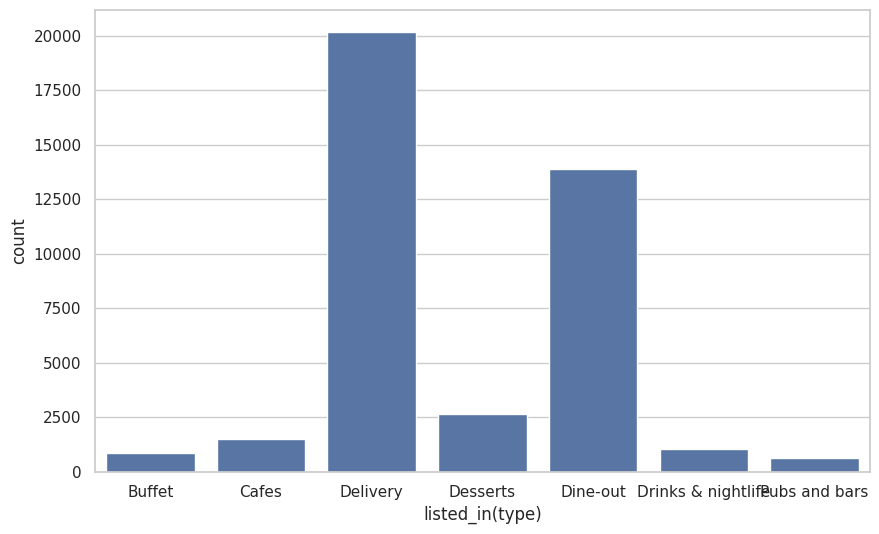

In [170]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='listed_in(type)')

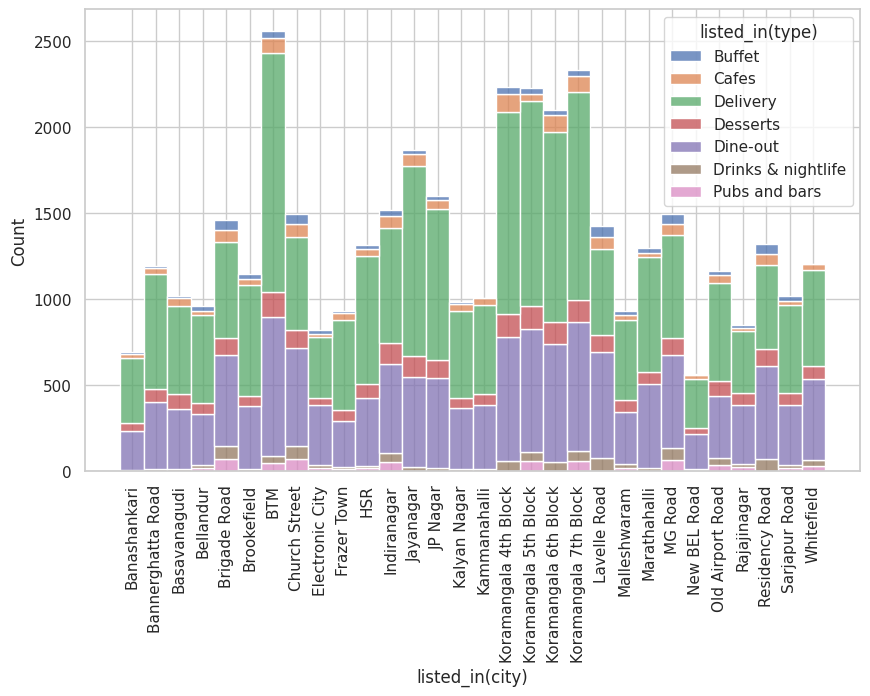

In [171]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, hue='listed_in(type)', x='listed_in(city)', multiple='stack')
plt.xticks(rotation=90)
plt.show()

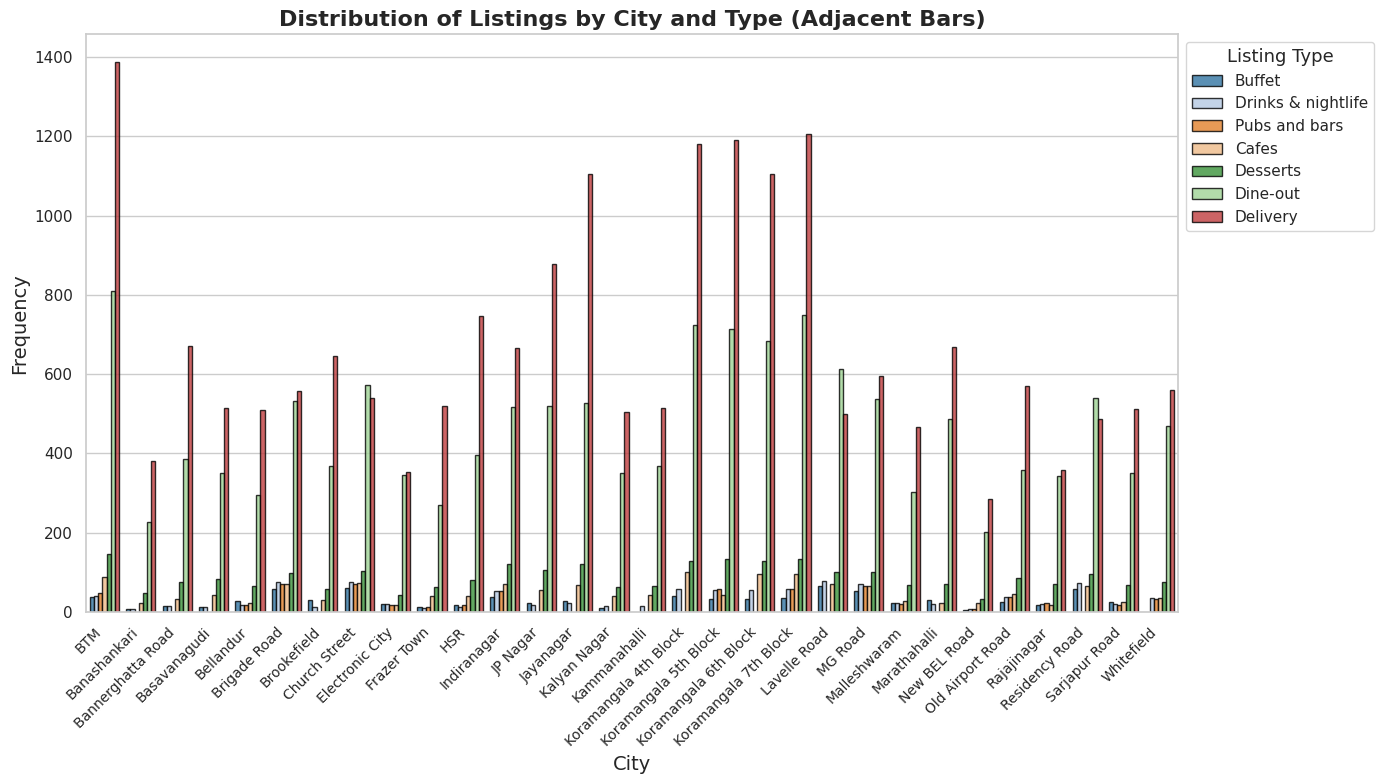

In [172]:
sns.set_style("whitegrid")
palette = sns.color_palette("tab20", n_colors=df['listed_in(type)'].nunique())

freq_data = df.groupby(['listed_in(city)', 'listed_in(type)']).size().reset_index(name='count')
freq_data = freq_data.sort_values(['listed_in(city)', 'count'], ascending=[True, True])
plt.figure(figsize=(14, 8))
sns.barplot(
    data=freq_data,
    x='listed_in(city)',
    y='count',
    hue='listed_in(type)',
    dodge=True,
    palette=palette,
    edgecolor="black",
    alpha=0.8
)

plt.xticks(rotation=45, ha='right', fontsize=10)
plt.xlabel('City', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Listings by City and Type (Adjacent Bars)', fontsize=16, weight='bold')

plt.legend(title='Listing Type', title_fontsize=13, fontsize=11, loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()

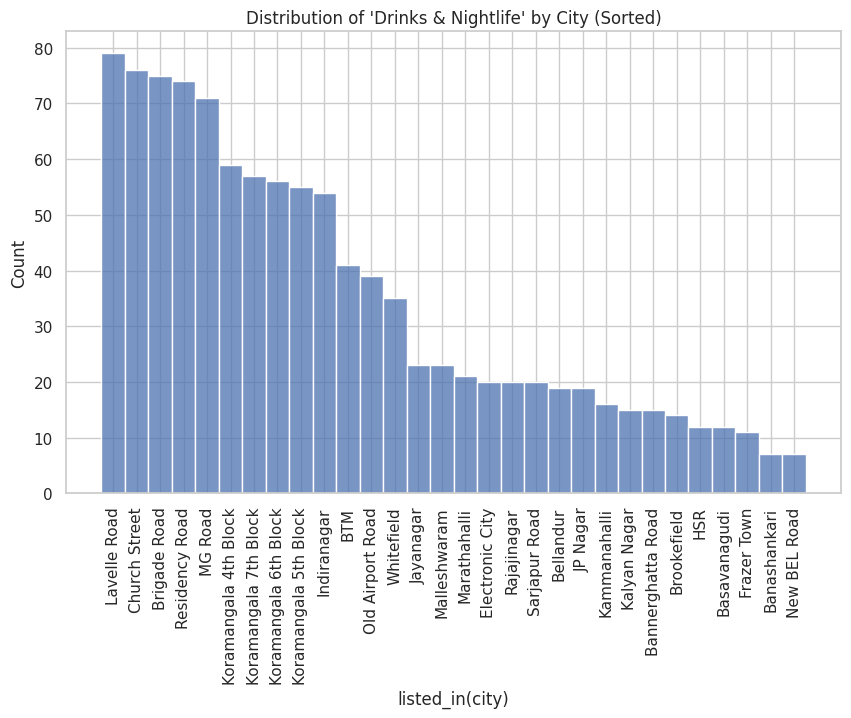

In [173]:
# Filter the dataset to include only rows where 'listed_in(type)' is 'Drinks & nightlife'
filtered_df = df[df['listed_in(type)'] == 'Drinks & nightlife']
# Count occurrences and reorder the DataFrame by city counts
city_counts = filtered_df['listed_in(city)'].value_counts()
sorted_cities = city_counts.index
# Set 'listed_in(city)' as a categorical type with sorted order
filtered_df['listed_in(city)'] = pd.Categorical(filtered_df['listed_in(city)'], categories=sorted_cities, ordered=True)
plt.figure(figsize=(10, 6))
sns.histplot(data=filtered_df, x='listed_in(city)', multiple='stack')
plt.xticks(rotation=90)  # Rotate x-axis labels by 90 degrees for better readability
plt.title("Distribution of 'Drinks & Nightlife' by City (Sorted)")
plt.show()

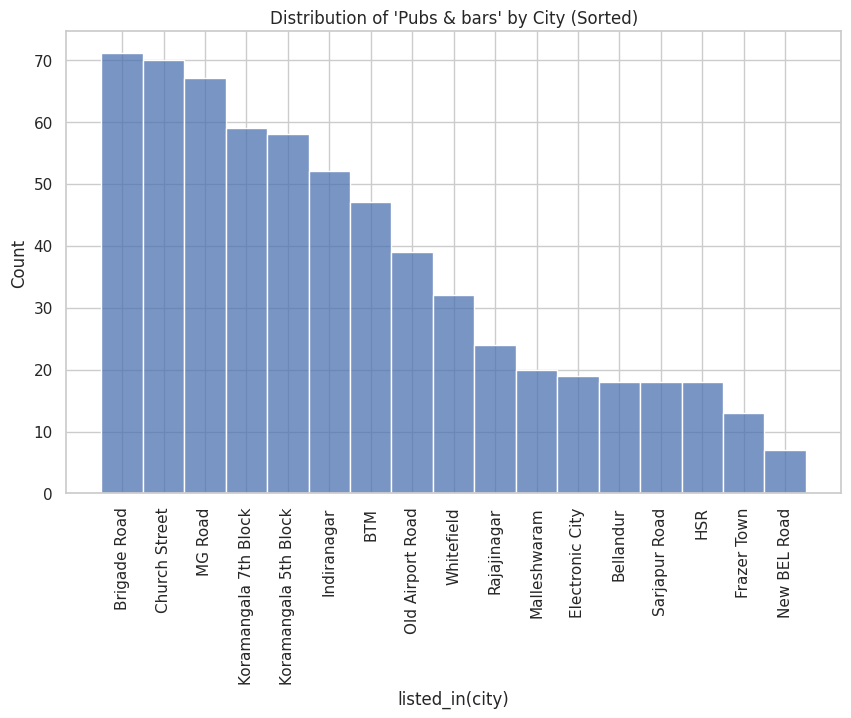

In [174]:
# Filter the dataset to include only rows where 'listed_in(type)' is 'Drinks & nightlife'
filtered_df = df[df['listed_in(type)'] == 'Pubs and bars']
# Count occurrences and reorder the DataFrame by city counts
city_counts = filtered_df['listed_in(city)'].value_counts()
sorted_cities = city_counts.index
# Set 'listed_in(city)' as a categorical type with sorted order
filtered_df['listed_in(city)'] = pd.Categorical(filtered_df['listed_in(city)'], categories=sorted_cities, ordered=True)
plt.figure(figsize=(10, 6))
sns.histplot(data=filtered_df, x='listed_in(city)', multiple='stack')
plt.xticks(rotation=90)  # Rotate x-axis labels by 90 degrees for better readability
plt.title("Distribution of 'Pubs & bars' by City (Sorted)")
plt.show()

In [175]:
# Group the data by 'location' and calculate the mean rating for each location
rating_by_location = df.groupby('location')['rating'].mean().sort_values(ascending=False)
# Display the result
print(rating_by_location)

location
Lavelle Road             4.141788
Koramangala 3rd Block    4.020419
St. Marks Road           4.017201
Koramangala 5th Block    4.010215
Church Street            3.992125
                           ...   
Rammurthy Nagar          3.346154
North Bangalore          3.340000
Peenya                   3.200000
Bommanahalli             3.190972
Old Madras Road          3.181818
Name: rating, Length: 92, dtype: float64


In [176]:
# Get the top 10 locations with the highest average ratings
top_10_rating_by_location = rating_by_location.head(10)
# Display the top 10
print(top_10_rating_by_location)

location
Lavelle Road             4.141788
Koramangala 3rd Block    4.020419
St. Marks Road           4.017201
Koramangala 5th Block    4.010215
Church Street            3.992125
Sankey Road              3.965385
Koramangala 4th Block    3.918668
Cunningham Road          3.901053
Residency Road           3.865657
Koramangala 7th Block    3.855577
Name: rating, dtype: float64


In [177]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'reviews_list', 'menu_item', 'listed_in(type)', 'listed_in(city)',
       'rating', 'Cost_For_two', 'Cuisine_Count'],
      dtype='object')

In [178]:
import plotly.express as px

# Calculate average ratings and total votes for each location
top_10_df = df.groupby('location').agg(
    rating=('rating', 'mean'),  # Average rating
    votes=('votes', 'sum')       # Total votes
).reset_index()

# Format the votes with commas for better readability
top_10_df['votes'] = top_10_df['votes'].apply(lambda x: f"{x:,}")

# Get the top 10 locations by average rating
top_10_df = top_10_df.nlargest(10, 'rating')

# Use plotly to create an interactive bar chart with sky blue color
fig = px.bar(
    top_10_df,
    x='location',
    y='rating',
    title="Top 10 Locations by Average Rating",
    labels={'location': 'Location', 'rating': 'Average Rating', 'votes': 'Votes'},
    color_discrete_sequence=['#87CEEB'],  # Sky blue color
    hover_data=['votes']  # Include formatted votes in the hover tooltip
)

# Customize the layout
fig.update_layout(width=600, height=400)
fig.show()


In [179]:
import plotly.express as px

# Create a bar plot for the online_order data with percentages
fig = px.histogram(df, x='online_order', title="Distribution of Online Orders (Percentage)",
                   labels={'online_order': 'Online Order'},
                   color_discrete_sequence=['#87CEEB'],
                   histnorm='percent')  # Show percentages instead of counts

# Customize the layout and set figure size
fig.update_layout(width=600, height=400, yaxis_title="Percentage")
# Show the plot
fig.show()


In [180]:
df[df['online_order']=='No'].shape

(13936, 18)

In [181]:
fig = px.histogram(
    df,
    x='book_table',
    title="Distribution of Book Table",
    labels={'book_table': 'Book Table', 'y': 'Percentage'},
    color_discrete_sequence=['#87CEEB'],
    histnorm='percent'
)
fig.update_layout(
    width=600,
    height=400,
    yaxis_title='Percentage (%)',
    xaxis_title='Book Table',
    bargap=0.2
)


fig.update_yaxes(tickformat=".1f%")


fig.show()

# Removing duplicate address column's values and plotting to see the branch count

In [182]:
# Keep the last occurrence of each duplicate address
df_no_duplicates = df.drop_duplicates(subset='address', keep='last')


In [183]:
df_no_duplicates.shape

(8648, 18)

In [184]:
hotel_location_counts_ = df_no_duplicates.groupby('name')['location'].nunique()

# Sort hotels by the number of locations (in descending order)
sorted_hotel_location_counts_after_removing_duplicates = hotel_location_counts_.sort_values(ascending=False)

In [185]:
sorted_hotel_location_counts_after_removing_duplicates[0:10]

name
cafe coffee day      31
domino's pizza       29
pizza hut            27
five star chicken    27
kanti sweets         26
kfc                  26
just bake            24
mcdonald's           22
faasos               22
baskin robbins       20
Name: location, dtype: int64

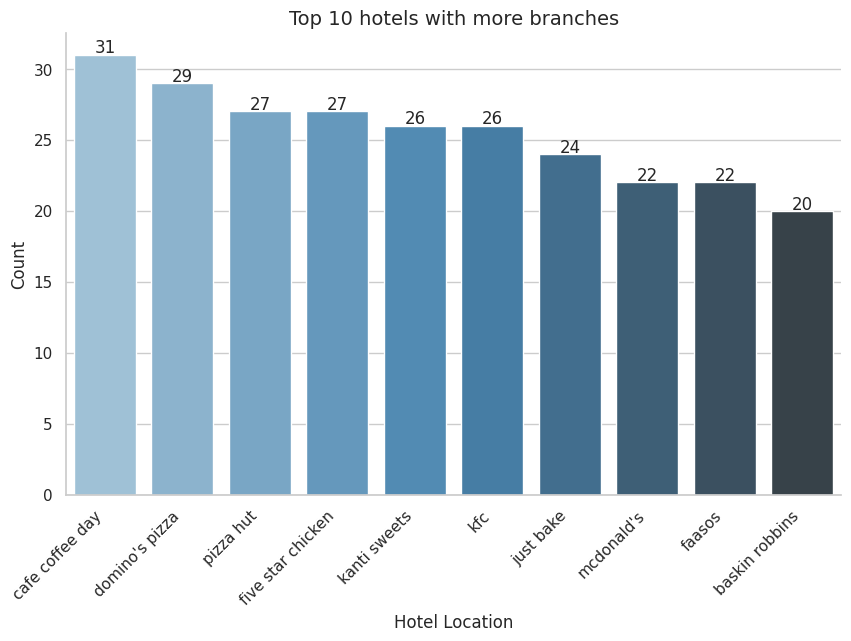

In [186]:
plt.figure(figsize=(10, 6))
sns.set_theme(style="whitegrid")  # Set a clean background style

# Create the bar plot
ax = sns.barplot(
    x=sorted_hotel_location_counts_after_removing_duplicates[:10].index,
    y=sorted_hotel_location_counts_after_removing_duplicates[:10].values,
    palette="Blues_d"  # Choose a color palette; adjust to your preference
)

# Add labels and title
ax.set_title("Top 10 hotels with more branches", fontsize=14)
ax.set_xlabel("Hotel Location", fontsize=12)
ax.set_ylabel("Count", fontsize=12)

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha="right")

# Add data labels on top of each bar
for p in ax.patches:
    ax.annotate(
        format(int(p.get_height()), ","),
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha="center", va="center",
        xytext=(0, 5), textcoords="offset points"
    )

# Remove unnecessary spines for a cleaner look
sns.despine()

plt.show()

In [187]:
df_no_duplicates.sort_values(by='name', ascending=True)


,url,address,name,online_order,book_table,votes,phone,location,rest_type,dish_liked,cuisines,reviews_list,menu_item,listed_in(type),listed_in(city),rating,Cost_For_two,Cuisine_Count
49511,https://www.zomato.com/bangalore/feeltheroll-b...,"Opposite Mantri Commercio, Outer Ring Road, De...",#feeltheroll,No,No,7,+91 9108342079\n+91 9886117901,Bellandur,Quick Bites,NaN,fast food,"[('Rated 5.0', ""RATED\n Had an egg chicken ro...",[],Delivery,Sarjapur Road,3.4,200,1
36386,https://www.zomato.com/bangalore/l-81-cafe-hsr...,"Sector 6, HSR Layout, HSR",#l-81 cafe,Yes,No,48,+91 9986210891,HSR,Quick Bites,Burgers,"fast food, beverages","[('Rated 4.0', 'RATED\n This little cafe is s...",[],Delivery,Koramangala 7th Block,3.9,400,2
1967,https://www.zomato.com/bangalore/refuel-banner...,"7, Ground Floor, RR Commercial Complex, Akshay...",#refuel,Yes,No,37,+91 8971227222,Bannerghatta Road,Cafe,"Thick Shakes, Sandwiches, Pasta, Mocktails","cafe, beverages","[('Rated 3.0', 'RATED\n We ordered for Schezw...",[],Dine-out,Bannerghatta Road,3.7,400,2
35295,https://www.zomato.com/bangalore/1000-b-c-kora...,"16, 17th A Main, Koramangala 5th Block, Bangalore",1000 b.c,Yes,No,49,+91 9620946663,Koramangala 5th Block,Quick Bites,"Shawarma, Sandwiches","arabian, sandwich, rolls, burger","[('Rated 1.0', ""RATED\n Ordered a chicken sub...",[],Delivery,Koramangala 7th Block,3.2,300,4
23738,https://www.zomato.com/bangalore/100%C2%B0c-bt...,"688, Thanish Corner, 7th Main, 10th Cross, 2nd...",100ãâãâãâãâãâãâãâãâ°c,No,No,41,+91 9535433735,BTM,Casual Dining,Chicken Biryani,"biryani, north indian","[('Rated 1.0', 'RATED\n They are frod they ha...",[],Dine-out,JP Nagar,3.7,450,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48018,https://www.zomato.com/bangalore/zoroy-luxury-...,"44, Near K C Das, Off Brigade Road, Church Str...",zoroy luxury chocolate,Yes,No,68,080 41126811\n+91 8880066000,Church Street,Dessert Parlor,Hot Chocolate,desserts,"[('Rated 4.0', 'RATED\n A good shop for handm...",[],Desserts,Residency Road,4.0,250,1
39940,https://www.zomato.com/bangalore/zus-doner-keb...,"No 214, opp nandini hotel, 80 ft main road, RT...",zu's doner kebaps,No,No,33,NaN,RT Nagar,"Takeaway, Delivery",NaN,"turkish, fast food, biryani, chinese","[('Rated 5.0', ''), ('Rated 2.0', ''), ('Rated...",[],Delivery,Malleshwaram,3.7,350,4
26027,https://www.zomato.com/bangalore/zus-doner-keb...,"44, Shop 1, 5th Cross, 5th Main, KEB Main Road...",zu's doner kebaps,Yes,No,22,+91 9611900777,Kammanahalli,NaN,NaN,"turkish, fast food","[('Rated 1.0', 'RATED\n for came 45 minutes l...",[],Dine-out,Kammanahalli,3.6,350,2
26169,https://www.zomato.com/bangalore/zyara-hbr-lay...,"46, 80 Feet Road, Opposite HP Petrol Pump, HBR...",zyara,Yes,No,191,+91 9148444441\n+91 9148444442,HBR Layout,Casual Dining,"Shawarma, Chicken Grill, Tandoori Chicken, Chi...","north indian, mughlai, chinese","[('Rated 3.0', 'RATED\n When I visited this p...",[],Dine-out,Kammanahalli,3.8,650,3


In [188]:
hotel_counts = df_no_duplicates.groupby('location')['name'].nunique()
hotel_counts

location
BTM                  475
Banashankari         200
Banaswadi            135
Bannerghatta Road    312
Basavanagudi         156
                    ... 
West Bangalore         1
Whitefield           525
Wilson Garden         30
Yelahanka              2
Yeshwantpur           59
Name: name, Length: 91, dtype: int64

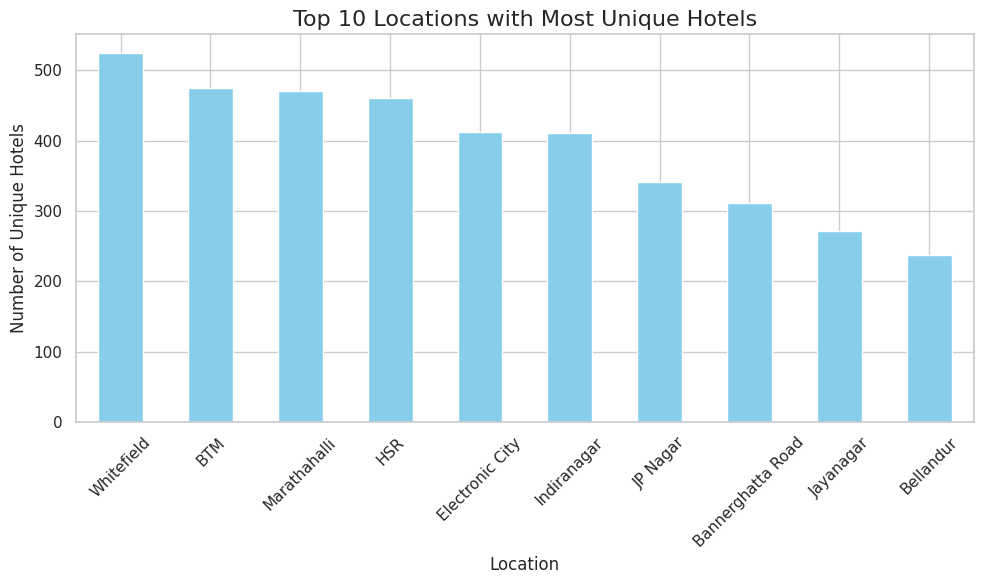

In [189]:

# Get top 10 locations with the most unique hotels
top_10_locations = hotel_counts.nlargest(10)

# Plotting
plt.figure(figsize=(10, 6))
top_10_locations.plot(kind='bar', color='skyblue')

# Adding labels and title
plt.title('Top 10 Locations with Most Unique Hotels', fontsize=16)
plt.xlabel('Location', fontsize=12)
plt.ylabel('Number of Unique Hotels', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

In [190]:
hotel_counts.sum()

np.int64(8413)

In [191]:
df_no_duplicates.name.nunique()

6103

In [192]:
df_no_duplicates['listed_in(city)'].nunique()

30

In [193]:
df_no_duplicates['location'].nunique()

91

Book table vs. area

In [194]:
# Filter for rows where 'book_table' is 'Yes' and group by 'location' to get the count
yes_book_table_by_location = df_no_duplicates[df_no_duplicates['book_table'] == 'Yes'].groupby('listed_in(city)').size()
# Alternatively, if you want a DataFrame format with counts
yes_book_table_by_location = df_no_duplicates[df_no_duplicates['book_table'] == 'Yes'].groupby('listed_in(city)').agg({'book_table': 'count'}).rename(columns={'book_table': 'count'})

In [195]:
# Sorting by the 'count' column if it’s a DataFrame
yes_book_table_by_location = yes_book_table_by_location.sort_values(by='count', ascending=False)

In [196]:
yes_book_table_by_location[0:10]

,count
listed_in(city),
Koramangala 7th Block,142
Residency Road,117
Old Airport Road,88
Whitefield,77
JP Nagar,66
Kammanahalli,52
Marathahalli,47
Sarjapur Road,44
Rajajinagar,36


In [197]:
# filtered_df = df_no_duplicates[(df_no_duplicates['book_table'] == 'Yes') & (df_no_duplicates['listed_in(city)'] == 'Koramangala 7th Block')]
# filtered_df.sort_values(by='name', ascending=True)

In [198]:
filtered_df.shape

(632, 18)

# Try with duplicate data

In [199]:
# Filter for rows where 'book_table' is 'Yes' and group by 'location' to get the count
yes_book_table_by_location = df[df['book_table'] == 'Yes'].groupby('listed_in(city)').size()
# Alternatively, if you want a DataFrame format with counts
yes_book_table_by_location = df[df['book_table'] == 'Yes'].groupby('listed_in(city)').agg({'book_table': 'count'}).rename(columns={'book_table': 'count'})

In [200]:
# Sorting by the 'count' column if it’s a DataFrame
yes_book_table_by_location = yes_book_table_by_location.sort_values(by='count', ascending=False)

In [201]:
yes_book_table_by_location[0:10]

,count
listed_in(city),
Koramangala 7th Block,373
BTM,364
Church Street,362
MG Road,356
Koramangala 4th Block,355
Koramangala 5th Block,352
Brigade Road,349
Lavelle Road,327
Koramangala 6th Block,321


In [202]:
filtered_df = df[(df['book_table'] == 'Yes') & (df['listed_in(city)'] == 'Koramangala 7th Block')]

In [203]:
filtered_df.sort_values(by='name', ascending=True)

,url,address,name,online_order,book_table,votes,phone,location,rest_type,dish_liked,cuisines,reviews_list,menu_item,listed_in(type),listed_in(city),rating,Cost_For_two,Cuisine_Count
34752,https://www.zomato.com/bangalore/12th-main-gra...,"Grand Mercure, 12th Main, 3rd Block, Koramanga...",12th main - grand mercure,No,Yes,354,080 45121638\n080 45121212,Koramangala 3rd Block,Fine Dining,"Halwa, Waffles, Chaat, Pasta, Coffee, Creme Br...","european, asian","[('Rated 2.0', 'RATED\n Went here recently fo...",[],Buffet,Koramangala 7th Block,4.1,2000,2
36830,https://www.zomato.com/bangalore/12th-main-gra...,"Grand Mercure, 12th Main, 3rd Block, Koramanga...",12th main - grand mercure,No,Yes,357,080 45121638\n080 45121212,Koramangala 3rd Block,Fine Dining,"Halwa, Waffles, Chaat, Pasta, Coffee, Creme Br...","european, asian","[('Rated 5.0', 'RATED\n Like I always say in ...",[],Dine-out,Koramangala 7th Block,4.1,2000,2
36708,https://www.zomato.com/bangalore/1522-the-pub-...,"3, 80 Feet Road, 4-C Block, Koramangala 4th Bl...",1522 - the pub,No,Yes,1746,+91 9980985527\n+91 9481451597,Koramangala 4th Block,Pub,"Cocktails, Devils Chicken, Beer, Tandoori Chic...","chinese, continental, north indian","[('Rated 4.0', 'RATED\n The pasta was amazing...",[],Dine-out,Koramangala 7th Block,4.2,1400,3
35984,https://www.zomato.com/bangalore/1522-the-pub-...,"3, 80 Feet Road, 4-C Block, Koramangala 4th Bl...",1522 - the pub,No,Yes,1745,+91 9980985527\n+91 9481451597,Koramangala 4th Block,Pub,"Cocktails, Devils Chicken, Beer, Tandoori Chic...","chinese, continental, north indian","[('Rated 4.0', 'RATED\n The pasta was amazing...",[],Delivery,Koramangala 7th Block,4.2,1400,3
37561,https://www.zomato.com/bangalore/1522-the-pub-...,"3, 80 Feet Road, 4-C Block, Koramangala 4th Bl...",1522 - the pub,No,Yes,1746,080 49652895,Koramangala 4th Block,Pub,"Cocktails, Devils Chicken, Beer, Tandoori Chic...","chinese, continental, north indian","[('Rated 4.0', 'RATED\n The pasta was amazing...",[],Drinks & nightlife,Koramangala 7th Block,4.2,1400,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37567,https://www.zomato.com/bangalore/whats-in-a-na...,"146, Next to William Penn Showroom, Koramangal...",what's in a name,Yes,Yes,1798,080 49652465,Koramangala 5th Block,Pub,"Cocktails, Chicken Nachos, Pizza, Peri Peri Fr...","finger food, asian, european, italian","[('Rated 3.0', 'RATED\n We went over for a qu...","['Chilli Chicken', 'Beef Steak with Mash and V...",Drinks & nightlife,Koramangala 7th Block,4.1,1200,4
36670,https://www.zomato.com/bangalore/xoox-brewmill...,"8, Koramanagala Industrial Layout, Near HDFC B...",xoox brewmill,No,Yes,1592,080 49652469,Koramangala 5th Block,"Microbrewery, Casual Dining","Cocktails, Apple Cider, Craft Beer, Burgers, S...","modern indian, european, asian","[('Rated 5.0', ""RATED\n It was ABSOLUTELY LOV...",[],Dine-out,Koramangala 7th Block,4.4,2000,3
37540,https://www.zomato.com/bangalore/xoox-brewmill...,"8, Koramanagala Industrial Layout, Near HDFC B...",xoox brewmill,No,Yes,1592,080 49652469,Koramangala 5th Block,"Microbrewery, Casual Dining","Cocktails, Apple Cider, Craft Beer, Burgers, S...","modern indian, european, asian","[('Rated 5.0', ""RATED\n It was ABSOLUTELY LOV...",[],Drinks & nightlife,Koramangala 7th Block,4.4,2000,3
34726,https://www.zomato.com/bangalore/xoox-brewmill...,"8, Koramanagala Industrial Layout, Near HDFC B...",xoox brewmill,No,Yes,1577,080 49652469,Koramangala 5th Block,"Microbrewery, Casual Dining","Cocktails, Apple Cider, Craft Beer, Burgers, S...","modern indian, european, asian","[('Rated 3.0', ""RATED\n This is a really pret...",[],Buffet,Koramangala 7th Block,4.4,2000,3


Checking whether the mismatched filtration works fine


In [204]:
# duplicates=filtered_df = pd.DataFrame({'name':['a','a','b'],'book_table':['Yes','No','Yes']})
# mismatched_book_table = duplicates.groupby('name').filter(lambda x: x['book_table'].nunique() > 1)

# mismatched_book_table

In [205]:
# Find rows with duplicate 'name' values
duplicates = filtered_df[filtered_df.duplicated(subset=['name'], keep=False)]

# Group by 'name' and filter groups where 'book_table' values are not the same
mismatched_book_table = duplicates.groupby('name').filter(lambda x: x['book_table'].nunique() > 1)

mismatched_book_table


,url,address,name,online_order,book_table,votes,phone,location,rest_type,dish_liked,cuisines,reviews_list,menu_item,listed_in(type),listed_in(city),rating,Cost_For_two,Cuisine_Count


In [206]:
print("Dimension of the dataframe named 'df' ",df.shape)
print("Dimension of the dataframe named 'df_no_duplicates.shape'",df_no_duplicates.shape)

Dimension of the dataframe named 'df'  (40764, 18)
Dimension of the dataframe named 'df_no_duplicates.shape' (8648, 18)


In [207]:
# !pip install ipywidgets

In [208]:
from IPython.display import display
import ipywidgets as widgets

In [209]:
# Dropdown widget for location input
location_input = widgets.Combobox(
    placeholder="Type a location...",
    options=df['listed_in(city)'].unique().tolist(),
    description="Location:",
    ensure_option=False,
    continuous_update=True
)

# Output widget to display results
output = widgets.Output()

def display_bookable_shops(change):
    """Callback function to filter and display results."""
    output.clear_output()
    location = change['new']  # Get user input
    if location:
        filtered_df = df[(df['book_table'] == 'Yes') & (df['listed_in(city)'].str.contains(location, case=False))]
        with output:
            if not filtered_df.empty:
                display(filtered_df[['name', 'listed_in(city)']].sort_values(by='name'))
            else:
                print("No table bookable shops found for the entered location.")

# Attach the callback to the input widget
location_input.observe(display_bookable_shops, names='value')

# Display the input widget and output
display(location_input, output)

Combobox(value='', description='Location:', options=('Banashankari', 'Bannerghatta Road', 'Basavanagudi', 'Bel…

Output()

In [210]:
table_bookable = input("Enter the location to see the table bookable food shops:")
filter=(df['book_table'] == 'Yes') & (df['listed_in(city)'] == table_bookable)
filtered_df = df[filter]
filtered_df.sort_values(by='name', ascending=True)

Enter the location to see the table bookable food shops: BTM


,url,address,name,online_order,book_table,votes,phone,location,rest_type,dish_liked,cuisines,reviews_list,menu_item,listed_in(type),listed_in(city),rating,Cost_For_two,Cuisine_Count
8291,https://www.zomato.com/bangalore/12th-main-gra...,"Grand Mercure, 12th Main, 3rd Block, Koramanga...",12th main - grand mercure,No,Yes,353,080 45121638\r\n080 45121212,Koramangala 3rd Block,Fine Dining,"Halwa, Waffles, Chaat, Pasta, Coffee, Creme Br...","european, asian","[('Rated 2.0', 'RATED\n Went here recently fo...",[],Buffet,BTM,4.1,2000,2
11064,https://www.zomato.com/bangalore/12th-main-gra...,"Grand Mercure, 12th Main, 3rd Block, Koramanga...",12th main - grand mercure,No,Yes,353,080 45121638\r\r\n080 45121212,Koramangala 3rd Block,Fine Dining,"Halwa, Waffles, Chaat, Pasta, Coffee, Creme Br...","european, asian","[('Rated 2.0', 'RATED\n Went here recently fo...",[],Dine-out,BTM,4.1,2000,2
8949,https://www.zomato.com/bangalore/154-breakfast...,"154, 8th Main Road, 3rd Block, Koramangala 3rd...",154 breakfast club,Yes,Yes,1509,080 25533133,Koramangala 3rd Block,Cafe,"Pancakes, Waffles, Bbq Sandwich, Mushroom Rago...","cafe, continental","[('Rated 4.0', ""RATED\n Good place for breakf...",[],Delivery,BTM,4.0,900,2
10957,https://www.zomato.com/bangalore/154-breakfast...,"154, 8th Main Road, 3rd Block, Koramangala 3rd...",154 breakfast club,Yes,Yes,1509,080 25533133,Koramangala 3rd Block,Cafe,"Pancakes, Waffles, Bbq Sandwich, Mushroom Rago...","cafe, continental","[('Rated 4.0', ""RATED\n Good place for breakf...",[],Dine-out,BTM,4.0,900,2
8347,https://www.zomato.com/bangalore/154-breakfast...,"154, 8th Main Road, 3rd Block, Koramangala 3rd...",154 breakfast club,Yes,Yes,1509,080 25533133,Koramangala 3rd Block,Cafe,"Pancakes, Waffles, Bbq Sandwich, Mushroom Rago...","cafe, continental","[('Rated 4.0', ""RATED\n Good place for breakf...",[],Cafes,BTM,4.0,900,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8269,https://www.zomato.com/bangalore/xoox-brewmill...,"8, Koramanagala Industrial Layout, Near HDFC B...",xoox brewmill,No,Yes,1533,080 49652469,Koramangala 5th Block,"Microbrewery, Casual Dining","Cocktails, Apple Cider, Craft Beer, Burgers, S...","modern indian, european, asian","[('Rated 5.0', ""RATED\n Highly recommend the ...",[],Buffet,BTM,4.4,2000,3
11452,https://www.zomato.com/bangalore/xoox-brewmill...,"8, Koramanagala Industrial Layout, Near HDFC B...",xoox brewmill,No,Yes,1533,080 49652469,Koramangala 5th Block,"Microbrewery, Casual Dining","Cocktails, Apple Cider, Craft Beer, Burgers, S...","modern indian, european, asian",[],[],Drinks & nightlife,BTM,4.4,2000,3
9048,https://www.zomato.com/bangalore/zaitoon-jp-na...,"21, 24th Main Road, 6th Phase, JP Nagar, Banga...",zaitoon,Yes,Yes,1543,080 41477977\r\r\n080 41488988,JP Nagar,Casual Dining,"Hummus Falafel, Gulab Jamun, Shawarma, Bbq Chi...","bbq, arabian, chinese, north indian, desserts","[('Rated 5.0', ""RATED\n Bedridden and after s...",[],Delivery,BTM,4.1,1000,5
10966,https://www.zomato.com/bangalore/zero-mile-pun...,"5th Floor, L167, Outer Ring Road, Service Lane...",zero mile punjab,Yes,Yes,1336,+91 9986785586,HSR,Casual Dining,"Lassi, Chicken Curry, Chicken Malai Tikka, But...","north indian, mughlai","[('Rated 4.0', 'RATED\n Came here last week. ...","['Lassi Bhar Ke [400 ml]', 'Lassi Halkee Phulk...",Dine-out,BTM,4.1,800,2


# Preparing Data Set for Recommendation system

## Cleaning Reviews feature , First taking 10 rows , to check wether the cleaning logic works goo0d.

In [211]:
# Slice the first 10 rows of the DataFrame
df_subset = df.iloc[:10].copy()

# Assign 'reviews_list' to the new column
df_subset['reviews_list test'] = df_subset['reviews_list']

# Check the shape
print(df_subset.shape)  # Should be (10, <number_of_columns + 1>)


(10, 19)


In [212]:
df_subset['reviews_list test'][0]


'[(\'Rated 4.0\', \'RATED\\n  A beautiful place to dine in.The interiors take you back to the Mughal era. The lightings are just perfect.We went there on the occasion of Christmas and so they had only limited items available. But the taste and service was not compromised at all.The only complaint is that the breads could have been better.Would surely like to come here again.\'), (\'Rated 4.0\', \'RATED\\n  I was here for dinner with my family on a weekday. The restaurant was completely empty. Ambience is good with some good old hindi music. Seating arrangement are good too. We ordered masala papad, panner and baby corn starters, lemon and corrionder soup, butter roti, olive and chilli paratha. Food was fresh and good, service is good too. Good for family hangout.\\nCheers\'), (\'Rated 2.0\', \'RATED\\n  Its a restaurant near to Banashankari BDA. Me along with few of my office friends visited to have buffet but unfortunately they only provide veg buffet. On inquiring they said this plac

In [213]:
# Function to clean the review text
def clean_review(review_text):
    # Remove the 'rated' part at the beginning and any extra spaces
    review_text = re.sub(r'^rated[^\w]*', '', review_text)

    # Remove newline characters
    review_text = review_text.replace("\n", " ")

    # Fix encoding issues (you can add more replacements for any problematic encodings)
    review_text = review_text.replace('ã\x83', '').replace('ã\x82', '').replace('ã\x82', '')

    # Remove extra spaces
    review_text = ' '.join(review_text.split())

    return review_text

# Function to clean the nested tuple inside the list
def clean_nested_tuples(text):
    try:
        # Use ast.literal_eval to safely evaluate the string into a Python object
        list_of_tuples = ast.literal_eval(text)  # Safely converts string to a list of tuples

        # Clean each tuple (both rating and review text)
        cleaned_list = [(rating, clean_review(review)) for rating, review in list_of_tuples]
        return cleaned_list
    except Exception as e:
        print(f"Error while parsing or cleaning the text: {e}")
        return []

# Apply the cleaning function to each row in the 'reviews_list' column
df_subset['reviews_list test'] = df_subset['reviews_list test'].apply(clean_nested_tuples)

In [214]:
# Step 1: Extract the 'reviews_list test' column
df_subset = df_subset['reviews_list test']

# Step 2: Explode the list of tuples into rows (each tuple is a separate row)
df_subset = df_subset.explode().reset_index(drop=True)


In [215]:
df_subset

0      (Rated 4.0, RATED A beautiful place to dine in...
1      (Rated 4.0, RATED I was here for dinner with m...
2      (Rated 2.0, RATED Its a restaurant near to Ban...
3      (Rated 4.0, RATED We went here on a weekend an...
4      (Rated 5.0, RATED The best thing about the pla...
                             ...                        
213    (Rated 5.0, RATED Being in banashankari, this ...
214    (Rated 4.0, RATED Our always go to place when ...
215    (Rated 4.0, RATED Yummy saucy fries!! Loved ev...
216    (Rated 4.0, RATED Value for money everything t...
217    (Rated 3.0, RATED It's a busy eatery in Banash...
Name: reviews_list test, Length: 218, dtype: object

In [216]:
recom_df = df
recom_df

,url,address,name,online_order,book_table,votes,phone,location,rest_type,dish_liked,cuisines,reviews_list,menu_item,listed_in(type),listed_in(city),rating,Cost_For_two,Cuisine_Count
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",jalsa,Yes,Yes,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","north indian, mughlai, chinese","[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,4.1,800,3
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",spice elephant,Yes,No,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","chinese, north indian, thai","[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,4.1,800,3
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",san churro cafe,Yes,No,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","cafe, mexican, italian","[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,3.8,800,3
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",addhuri udupi bhojana,No,No,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"south indian, north indian","[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,3.7,300,2
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",grand village,No,No,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","north indian, rajasthani","[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari,3.8,600,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51709,https://www.zomato.com/bangalore/the-farm-hous...,"136, SAP Labs India, KIADB Export Promotion In...",the farm house bar n grill,No,No,34,+91 9980121279\n+91 9900240646,Whitefield,"Casual Dining, Bar",NaN,"north indian, continental","[('Rated 4.0', 'RATED\n Ambience- Big and spa...",[],Pubs and bars,Whitefield,3.7,800,2
51711,https://www.zomato.com/bangalore/bhagini-2-whi...,"139/C1, Next To GR Tech Park, Pattandur Agraha...",bhagini,No,No,81,080 65951222,Whitefield,"Casual Dining, Bar","Biryani, Andhra Meal","andhra, south indian, chinese, north indian","[('Rated 4.0', 'RATED\n A fine place to chill...",[],Pubs and bars,Whitefield,2.5,800,4
51712,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",best brews - four points by sheraton bengaluru...,No,No,27,080 40301477,Whitefield,Bar,NaN,continental,"[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield,3.6,1500,1
51715,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,chime - sheraton grand bengaluru whitefield ho...,No,Yes,236,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",finger food,"[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield,4.3,2500,1


Normalising all text to lower case

In [217]:
# Apply lowercase transformation to all object columns
for col in recom_df.select_dtypes(include='object').columns:
    recom_df[col] = recom_df[col].str.lower()


Cleaning Phone columns


In [218]:

# Step 1: Replace newline characters with commas, only for string values
recom_df['phone'] = recom_df['phone'].apply(lambda x: x.replace('\r\n', ',').replace('\n', ',') if isinstance(x, str) else '')

# Step 2: Split multiple phone numbers into a list
recom_df['phone'] = recom_df['phone'].apply(lambda x: x.split(',') if x else [])

# Step 3: Clean, format each phone number, and remove the '+91' prefix if it exists
recom_df['phone'] = recom_df['phone'].apply(lambda numbers: [num.strip().replace(" ", "").lstrip('+91') for num in numbers if num])

# Step 4: Optionally, convert each list of numbers back to a single string (join with commas)
recom_df['phone'] = recom_df['phone'].apply(lambda numbers: ', '.join(numbers) if numbers else '')


In [219]:
recom_df

,url,address,name,online_order,book_table,votes,phone,location,rest_type,dish_liked,cuisines,reviews_list,menu_item,listed_in(type),listed_in(city),rating,Cost_For_two,Cuisine_Count
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st main road, 2nd stage, banashankari, ...",jalsa,yes,yes,775,"08042297555, 743772233",banashankari,casual dining,"pasta, lunch buffet, masala papad, paneer laja...","north indian, mughlai, chinese","[('rated 4.0', 'rated\n a beautiful place to ...",[],buffet,banashankari,4.1,800,3
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd floor, 80 feet road, near big bazaar, 6th ...",spice elephant,yes,no,787,08041714161,banashankari,casual dining,"momos, lunch buffet, chocolate nirvana, thai g...","chinese, north indian, thai","[('rated 4.0', 'rated\n had been here for din...",[],buffet,banashankari,4.1,800,3
2,https://www.zomato.com/sanchurrobangalore?cont...,"1112, next to kims medical college, 17th cross...",san churro cafe,yes,no,918,663487993,banashankari,"cafe, casual dining","churros, cannelloni, minestrone soup, hot choc...","cafe, mexican, italian","[('rated 3.0', ""rated\n ambience is not that ...",[],buffet,banashankari,3.8,800,3
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st floor, annakuteera, 3rd stage, banashankar...",addhuri udupi bhojana,no,no,88,620009302,banashankari,quick bites,masala dosa,"south indian, north indian","[('rated 4.0', ""rated\n great food and proper...",[],buffet,banashankari,3.7,300,2
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd floor, lakshmi associates, gandhi baza...",grand village,no,no,166,"8026612447, 01210005",basavanagudi,casual dining,"panipuri, gol gappe","north indian, rajasthani","[('rated 4.0', 'rated\n very good restaurant ...",[],buffet,banashankari,3.8,600,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51709,https://www.zomato.com/bangalore/the-farm-hous...,"136, sap labs india, kiadb export promotion in...",the farm house bar n grill,no,no,34,"80121279, 00240646",whitefield,"casual dining, bar",NaN,"north indian, continental","[('rated 4.0', 'rated\n ambience- big and spa...",[],pubs and bars,whitefield,3.7,800,2
51711,https://www.zomato.com/bangalore/bhagini-2-whi...,"139/c1, next to gr tech park, pattandur agraha...",bhagini,no,no,81,08065951222,whitefield,"casual dining, bar","biryani, andhra meal","andhra, south indian, chinese, north indian","[('rated 4.0', 'rated\n a fine place to chill...",[],pubs and bars,whitefield,2.5,800,4
51712,https://www.zomato.com/bangalore/best-brews-fo...,"four points by sheraton bengaluru, 43/3, white...",best brews - four points by sheraton bengaluru...,no,no,27,08040301477,whitefield,bar,NaN,continental,"[('rated 5.0', ""rated\n food and service are ...",[],pubs and bars,whitefield,3.6,1500,1
51715,https://www.zomato.com/bangalore/chime-sherato...,sheraton grand bengaluru whitefield hotel & co...,chime - sheraton grand bengaluru whitefield ho...,no,yes,236,08049652769,"itpl main road, whitefield",bar,"cocktails, pizza, buttermilk",finger food,"[('rated 4.0', 'rated\n nice and friendly pla...",[],pubs and bars,whitefield,4.3,2500,1


In [220]:
# Function to clean the review text
def clean_review(review_text):
    # Remove the 'rated' part at the beginning and any extra spaces
    review_text = re.sub(r'^rated[^\w]*', '', review_text)

    # Remove newline characters
    review_text = review_text.replace("\n", " ")

    # Fix encoding issues (you can add more replacements for any problematic encodings)
    review_text = review_text.replace('ã\x83', '').replace('ã\x82', '').replace('ã\x82', '')

    # Remove extra spaces
    review_text = ' '.join(review_text.split())

    return review_text

# Function to clean the nested tuple inside the list
def clean_nested_tuples(text):
    try:
        # Use ast.literal_eval to safely evaluate the string into a Python object
        list_of_tuples = ast.literal_eval(text)  # Safely converts string to a list of tuples

        # Clean each tuple (both rating and review text)
        cleaned_list = [(rating, clean_review(review)) for rating, review in list_of_tuples]
        return cleaned_list
    except Exception as e:
        # print(f"Error while parsing or cleaning the text: {e}")
        return []

# Apply the cleaning function to each row in the 'reviews_list' column
recom_df['reviews_list'] = recom_df['reviews_list'].apply(clean_nested_tuples)

In [221]:
recom_df

,url,address,name,online_order,book_table,votes,phone,location,rest_type,dish_liked,cuisines,reviews_list,menu_item,listed_in(type),listed_in(city),rating,Cost_For_two,Cuisine_Count
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st main road, 2nd stage, banashankari, ...",jalsa,yes,yes,775,"08042297555, 743772233",banashankari,casual dining,"pasta, lunch buffet, masala papad, paneer laja...","north indian, mughlai, chinese","[(rated 4.0, a beautiful place to dine in.the ...",[],buffet,banashankari,4.1,800,3
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd floor, 80 feet road, near big bazaar, 6th ...",spice elephant,yes,no,787,08041714161,banashankari,casual dining,"momos, lunch buffet, chocolate nirvana, thai g...","chinese, north indian, thai","[(rated 4.0, had been here for dinner with fam...",[],buffet,banashankari,4.1,800,3
2,https://www.zomato.com/sanchurrobangalore?cont...,"1112, next to kims medical college, 17th cross...",san churro cafe,yes,no,918,663487993,banashankari,"cafe, casual dining","churros, cannelloni, minestrone soup, hot choc...","cafe, mexican, italian","[(rated 3.0, ambience is not that good enough ...",[],buffet,banashankari,3.8,800,3
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st floor, annakuteera, 3rd stage, banashankar...",addhuri udupi bhojana,no,no,88,620009302,banashankari,quick bites,masala dosa,"south indian, north indian","[(rated 4.0, great food and proper karnataka s...",[],buffet,banashankari,3.7,300,2
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd floor, lakshmi associates, gandhi baza...",grand village,no,no,166,"8026612447, 01210005",basavanagudi,casual dining,"panipuri, gol gappe","north indian, rajasthani","[(rated 4.0, very good restaurant in neighbour...",[],buffet,banashankari,3.8,600,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51709,https://www.zomato.com/bangalore/the-farm-hous...,"136, sap labs india, kiadb export promotion in...",the farm house bar n grill,no,no,34,"80121279, 00240646",whitefield,"casual dining, bar",NaN,"north indian, continental","[(rated 4.0, ambience- big and spacious lawn w...",[],pubs and bars,whitefield,3.7,800,2
51711,https://www.zomato.com/bangalore/bhagini-2-whi...,"139/c1, next to gr tech park, pattandur agraha...",bhagini,no,no,81,08065951222,whitefield,"casual dining, bar","biryani, andhra meal","andhra, south indian, chinese, north indian","[(rated 4.0, a fine place to chill after offic...",[],pubs and bars,whitefield,2.5,800,4
51712,https://www.zomato.com/bangalore/best-brews-fo...,"four points by sheraton bengaluru, 43/3, white...",best brews - four points by sheraton bengaluru...,no,no,27,08040301477,whitefield,bar,NaN,continental,"[(rated 5.0, food and service are incomparably...",[],pubs and bars,whitefield,3.6,1500,1
51715,https://www.zomato.com/bangalore/chime-sherato...,sheraton grand bengaluru whitefield hotel & co...,chime - sheraton grand bengaluru whitefield ho...,no,yes,236,08049652769,"itpl main road, whitefield",bar,"cocktails, pizza, buttermilk",finger food,"[(rated 4.0, nice and friendly place and staff...",[],pubs and bars,whitefield,4.3,2500,1


In [222]:
# path = '/content/drive/MyDrive/Data_Set/cleaned_data.csv'
# recom_df.to_csv(path, index=False)
